In [1]:
from pathlib import Path
# Params
PATH_OUTPUT=Path("../output-rodan-smoothctc-momentum/")
MODEL=""
CHECKPOINT=""
DATETIME_FORMAT="%a %b %d %H:%M:%S %Y"
SPECIES=[
    "human",
    "mouse",
    "arabidopsis",
    "poplar",
    "yeast"
]

In [2]:
import json
import datetime
import seaborn as sns
import pandas as pd
import numpy as np

## Training 

In [3]:
path_metrics = PATH_OUTPUT.joinpath("training/metrics.csv")
metrics = pd.read_csv(path_metrics, index_col=False)
metrics.tail()

,timestamp,epoch,train_loss,val_loss
25,Mon Sep 4 09:04:42 2023,26,0.499974,0.473600
26,Mon Sep 4 12:36:18 2023,27,0.496049,0.467821
27,Mon Sep 4 16:07:46 2023,28,0.492333,0.465495
28,Mon Sep 4 19:39:16 2023,29,0.488783,0.462345
29,Mon Sep 4 23:10:43 2023,30,0.485394,0.460932


Text(0, 0.5, 'Smooth CTC Loss')

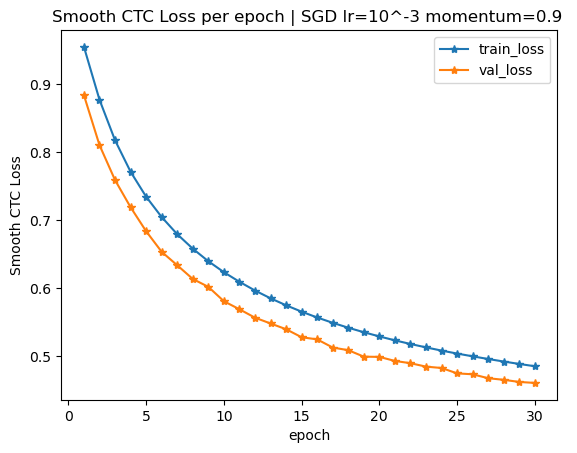

In [14]:
ax = metrics.plot(x="epoch", y=["train_loss","val_loss"], kind="line",marker="*")
ax.set_title("Smooth CTC Loss per epoch | SGD lr=10^-3 momentum=0.9 ")
ax.set_ylabel("Smooth CTC Loss")

In [5]:
times=metrics["timestamp"]
str2datetime = lambda t: datetime.datetime.strptime(t,DATETIME_FORMAT)
avg_time_epoch=np.mean([ (str2datetime(tf)-str2datetime(ti)).total_seconds() / 60  for tf,ti in zip(times[1:],times[:-1])])

print(f"Average time per epoch: {avg_time_epoch} [min] | {avg_time_epoch/60} [hr]")

Average time per epoch: 211.42988505747124 [min] | 3.5238314176245207 [hr]


### Basecalling
For each species, report:
- number of reads: 100.000
- number of mapped reads
- percentage of mapped reads
- accuracy of mapped reads
- total time spent in the basecalling


In [8]:
# def time_from_log(path_log):
path_log = "../logs/basecall_arabidopsis.err.log"

def time_from_log(path_log):
    with open(path_log) as fp:
        for line in fp.readlines():
            if "Elapsed (wall clock) time (h:mm:ss or m:ss):" in line:
                time = line.split(": ")[-1]
                time = time.replace("\n","")

    return time


In [9]:

def load_metrics(path_test):
    metrics = []
    for specie in SPECIES:
        print(specie)
        # log path
        if "orig" in str(path_test):
            path_log = f"../logs/basecall-rodan-orig_{specie}.err.log"
        elif "smoothctc" in str(path_test):
            path_log = path_test.parent.joinpath(f"logs/basecall-{specie}.err.log")
        else:
            path_log = f"../logs/basecall_{specie}.err.log"
        
        with open(path_test.joinpath(f"{specie}-accuracy.json")) as fp:
            specie_metrics = json.load(fp)
            specie_metrics["specie"] = specie
            specie_metrics["time"] = time_from_log(path_log) 
        
        metrics.append(specie_metrics)
    
    return pd.DataFrame(metrics)

In [10]:
PATH_RODAN_SMOOTHCTC_MOMENTUM = Path("../output-rodan-smoothctc-momentum/basecalling/test")
load_metrics(PATH_RODAN_SMOOTHCTC_MOMENTUM)

human
mouse
arabidopsis
poplar
yeast


,n_reads,median_accuracy,average_accuracy:,std,specie,time
0,89972,0.851282,0.847709,0.036286,human,1:46:03
1,53365,0.805505,0.805186,0.031832,mouse,50:39.98
2,93112,0.858439,0.855018,0.034293,arabidopsis,1:26:43
3,85066,0.845982,0.841626,0.032551,poplar,1:22:42
4,81572,0.853883,0.850422,0.032953,yeast,1:21:38


In [11]:
PATH_RODAN_ORIG = Path("../output-rodan-orig/basecalling/test")
load_metrics(PATH_RODAN_ORIG)

human
mouse
arabidopsis
poplar
yeast


,n_reads,median_accuracy,average_accuracy:,std,specie,time
0,98699,0.931915,0.924354,0.049132,human,3:31:22
1,97165,0.880165,0.875888,0.037757,mouse,1:51:08
2,98999,0.928994,0.922140,0.044024,arabidopsis,3:03:36
3,98335,0.911111,0.901053,0.042162,poplar,2:51:10
4,96972,0.914081,0.904533,0.041891,yeast,2:46:50
